In [13]:
from __future__ import print_function
import pyzbar.pyzbar as pyzbar
import numpy as np
import cv2
import math
from imutils import resize, rotate
from utils.cttutils import displayImage

In [14]:
def decode(im):
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)
    return decodedObjects

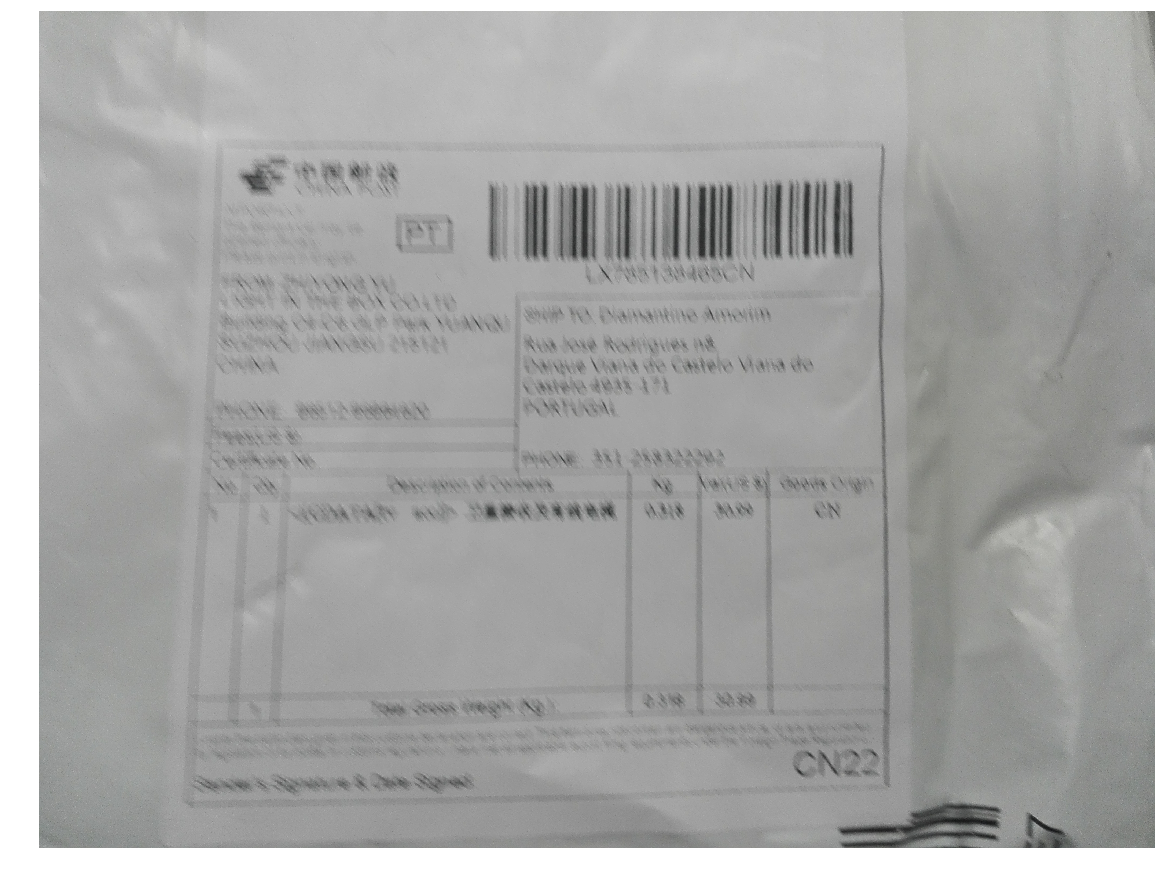

In [47]:
def readBarcode(image):
    decodedObjects = decode(image)
    barcodes =[]
    for obj in decodedObjects:
        barcodes.append(obj.data.decode('ascii'))
    return barcodes
    
im = cv2.imread('barcodeImages/IMG_20180321_174602.jpg')
#im = rotate(im, -10)
#im = rotate(im, 180)

displayImage(im,figSize=(20,20))
#im = im[1000:3000,2000:4000]
#displayImage(im,figSize=(20,20))


In [46]:
barcodes = np.array([])
for i in [200, 500, 1000]:
    t = resize(im, width=i)
    barcodes= np.unique(np.concatenate((barcodes, readBarcode(t))))
    
if len(barcodes) == 0:
    print('Doing sliding window:', )
    im2 = resize(im, 2000)
    #im2 = im
    slidingWindowSize = 1000
    imageWidth = im2.shape[1]
    imageHeight = im2.shape[0]
    steps = math.floor(imageHeight / slidingWindowSize)
    step = 200
    currentY = 0
    currentX = 0

    while (currentY + slidingWindowSize <= imageHeight):
        while(currentX + slidingWindowSize <= imageWidth):
            #print("using x", currentX, "and y", currentY)
            t = im2[currentY:slidingWindowSize + currentY,currentX:slidingWindowSize + currentX]
            #displayImage(t, figSize=(20,20))
            currentX = currentX + step
            barcodes= np.unique(np.concatenate((barcodes, readBarcode(t))))
            
        currentY = currentY + step
        currentX = 0
        
if len(barcodes) == 0:
    print('Doing sliding window 2:', )
    im2 = im
    slidingWindowSize = 800
    imageWidth = im2.shape[1]
    imageHeight = im2.shape[0]
    steps = math.floor(imageHeight / slidingWindowSize)
    step = 200
    currentY = 0
    currentX = 0

    while (currentY + slidingWindowSize <= imageHeight):
        while(currentX + slidingWindowSize <= imageWidth):
            #print("using x", currentX, "and y", currentY)
            t = im2[currentY:slidingWindowSize + currentY,currentX:slidingWindowSize + currentX]
            #displayImage(t, figSize=(20,20))
            currentX = currentX + step
            barcodes= np.unique(np.concatenate((barcodes, readBarcode(t))))
            
        currentY = currentY + step
        currentX = 0

print(barcodes)

Doing sliding window:
Doing sliding window 2:
[]


In [17]:
print(im.shape)

(2322, 4128, 3)
